# Heart Failure analysis and detection using Machine Learning techniques


In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score, classification_report, confusion_matrix, RocCurveDisplay
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [2]:
## Read the data
data = pd.read_csv("heart.csv")
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
# Basic information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [4]:
data.shape

(918, 12)

There are 918 rows and 12 columns


In [5]:
data.size

11016

In [6]:
data.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<Axes: >

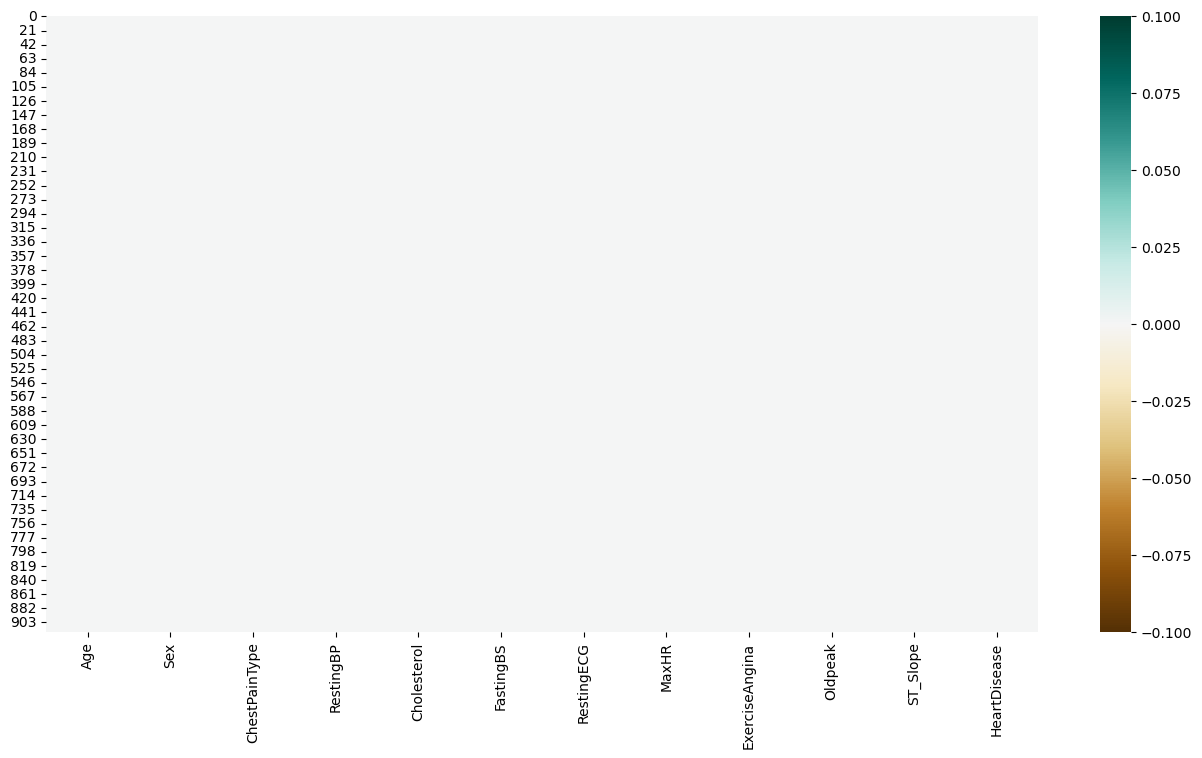

In [7]:
### visualize in the heatmap
plt.figure(figsize = (16,8))
sns.heatmap(data.isna(),cmap='BrBG')

In [8]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Data analysis


In [9]:
data['Sex'].value_counts()

Sex
M    725
F    193
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

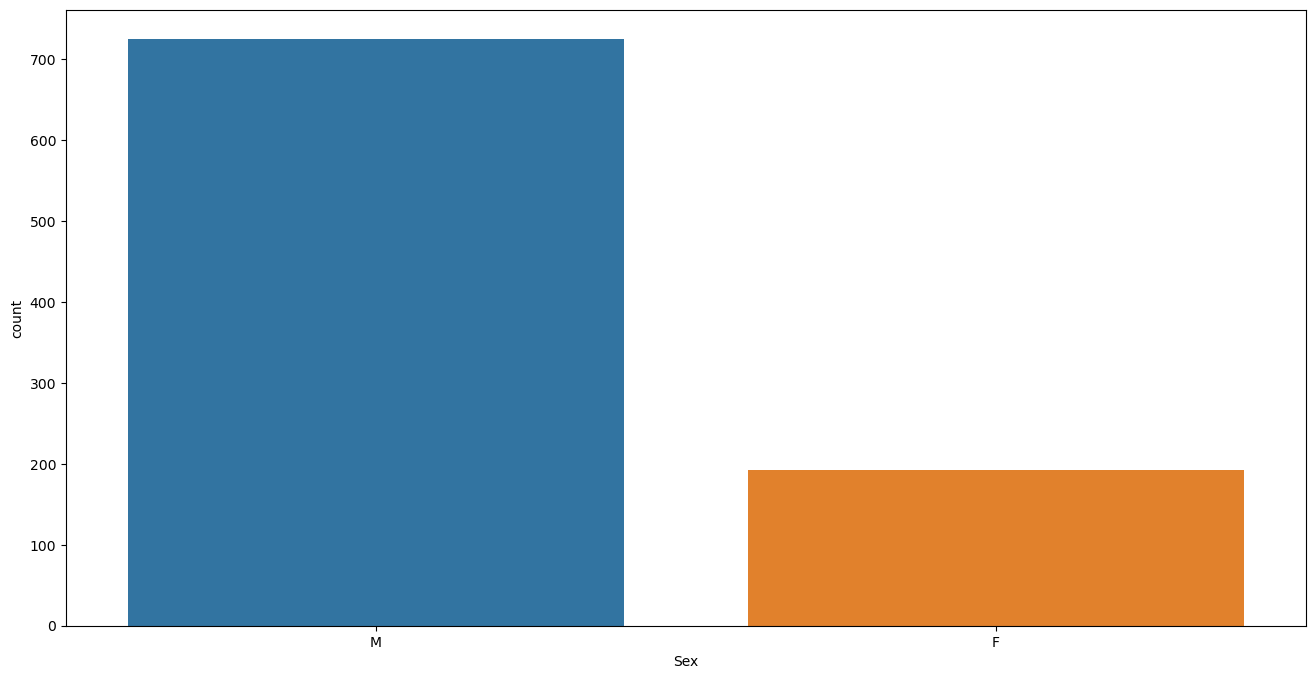

In [10]:
plt.figure(figsize = (16,8))
sns.countplot(data = data, x = 'Sex')

## According to this dataset, which gender suffered more from heart disease?

In [11]:
tot = data['HeartDisease'].groupby(data['Sex']).count()
suff = data['HeartDisease'].groupby(data['Sex']).sum()
not_suf = tot-suff
not_suf

Sex
F    143
M    267
Name: HeartDisease, dtype: int64

<Axes: xlabel='HeartDisease', ylabel='count'>

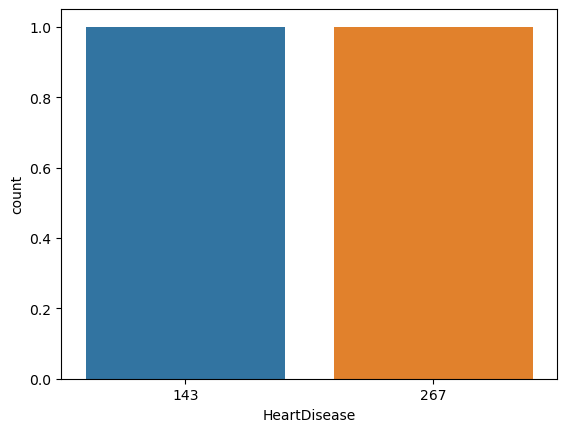

In [12]:
sns.countplot(data = data, x = not_suf)

<Axes: xlabel='HeartDisease', ylabel='count'>

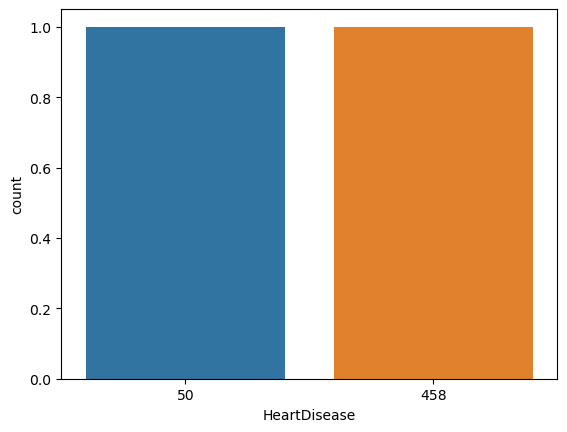

In [13]:
sns.countplot(data = data, x = suff)

In [14]:
female_suffered = suff[0]
male_suffered = suff[1]

C:\Users\prajw\AppData\Local\Temp\ipykernel_3804\3227672255.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  female_suffered = suff[0]
C:\Users\prajw\AppData\Local\Temp\ipykernel_3804\3227672255.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male_suffered = suff[1]


In [15]:
total_gend = data['Sex'].count()
print("Female suffered percent ", (female_suffered/total_gend)*100)

Female suffered percent  5.446623093681917


In [16]:
total_gend = data['Sex'].count()
print("Male suffered percent ", (male_suffered/total_gend)*100)

Male suffered percent  49.89106753812636


## Analyze the chest pain type

In [17]:
data['ChestPainType'].value_counts()

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64

<Axes: xlabel='ChestPainType', ylabel='count'>

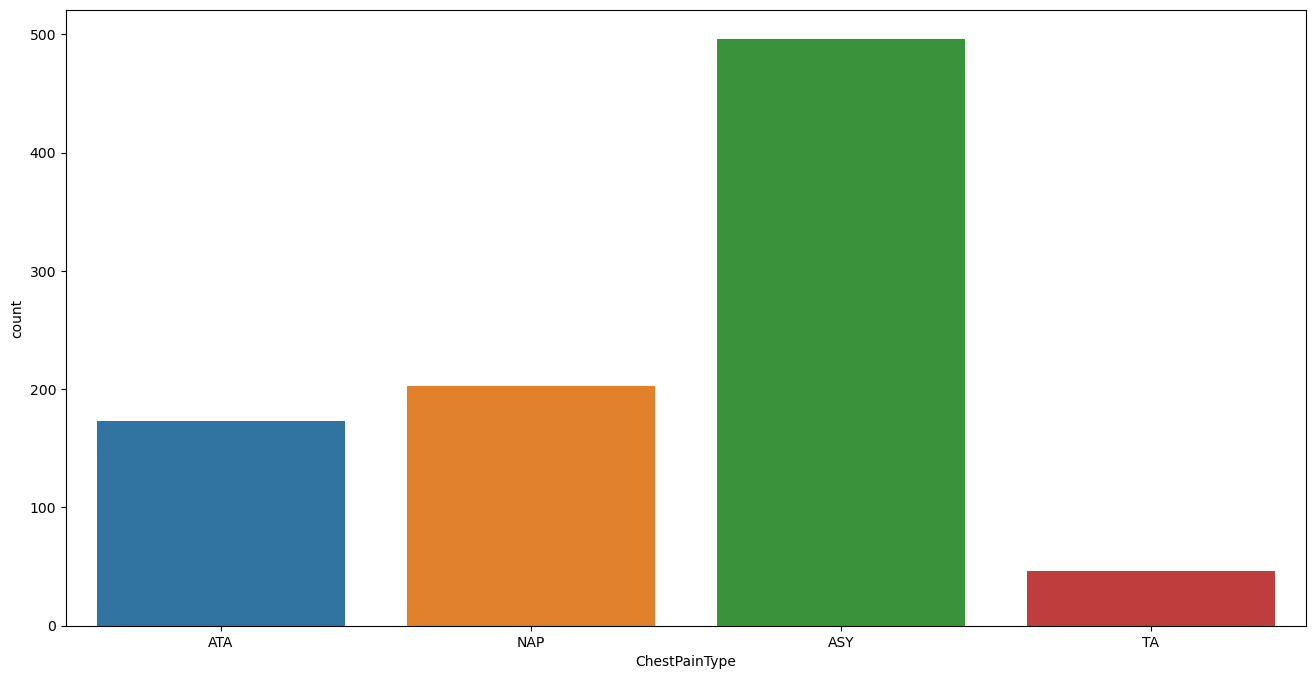

In [18]:
plt.figure(figsize = (16,8))
sns.countplot(data=data, x= 'ChestPainType')

In [19]:
count_me = data['HeartDisease'].groupby(data['ChestPainType']).count()

In [20]:
sum_me = data['HeartDisease'].groupby(data['ChestPainType']).sum()

In [21]:
sum_me

ChestPainType
ASY    392
ATA     24
NAP     72
TA      20
Name: HeartDisease, dtype: int64

In [22]:
no_risk = count_me-sum_me

In [23]:
print("{} of people who have ASY got heart disease and {} of people who have ASY doesn't get heart disease.".format(sum_me[0],no_risk[0]))

392 of people who have ASY got heart disease and 104 of people who have ASY doesn't get heart disease.


C:\Users\prajw\AppData\Local\Temp\ipykernel_3804\2156176294.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("{} of people who have ASY got heart disease and {} of people who have ASY doesn't get heart disease.".format(sum_me[0],no_risk[0]))


In [24]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Relation between RestingECG and the HeartDisease


In [25]:
data["RestingECG"].value_counts()

RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64

(array([552.,   0.,   0.,   0.,   0., 178.,   0.,   0.,   0., 188.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

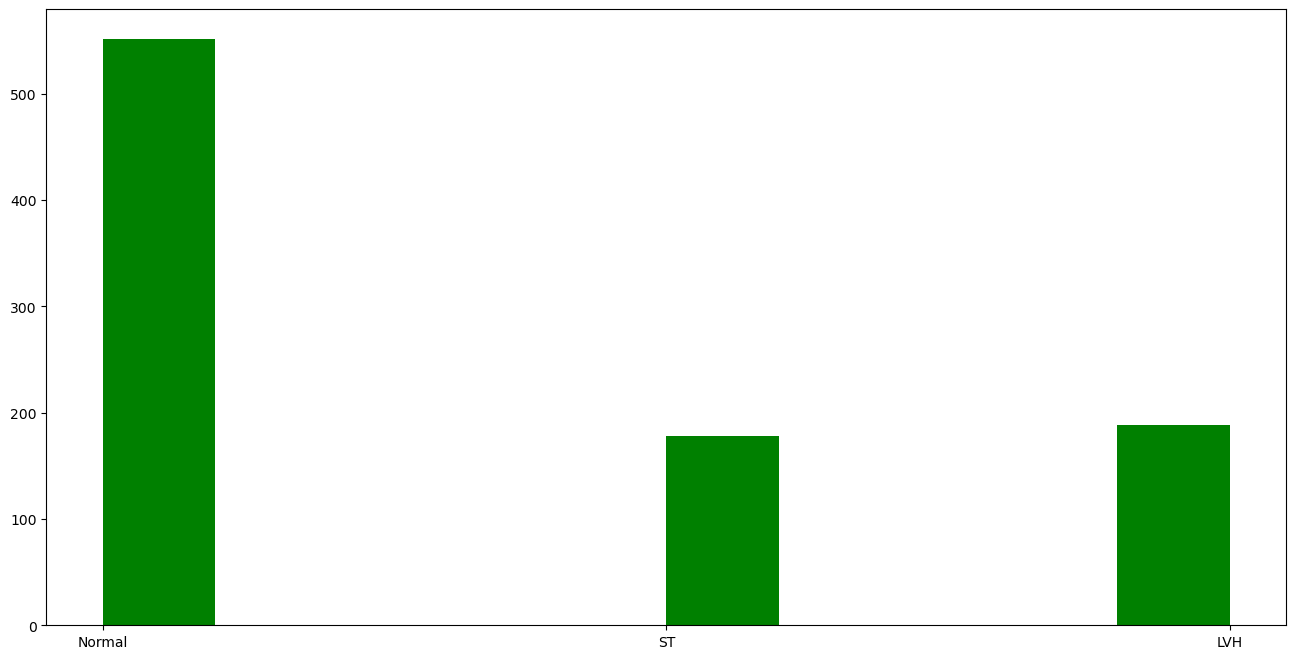

In [26]:
plt.figure(figsize = (16,8))
plt.hist(data["RestingECG"],color='green')

## Unique values to aid backend


In [27]:
s = data["Sex"].unique()
c = data["ChestPainType"].unique()
r = data["RestingECG"].unique()
e = data["ExerciseAngina"].unique()
sl = data["ST_Slope"].unique()

In [28]:
print(s)
print(c)
print(r)
print(e)
print(sl)

['M' 'F']
['ATA' 'NAP' 'ASY' 'TA']
['Normal' 'ST' 'LVH']
['N' 'Y']
['Up' 'Flat' 'Down']


## Label Encoding


In [29]:
labelencoder = LabelEncoder()
data["Sex"] = labelencoder.fit_transform(data["Sex"])

In [30]:
data["ChestPainType"] = labelencoder.fit_transform(data["ChestPainType"])
data["RestingECG"] = labelencoder.fit_transform(data["RestingECG"])
data["ExerciseAngina"] = labelencoder.fit_transform(data["ExerciseAngina"])
data["ST_Slope"] = labelencoder.fit_transform(data["ST_Slope"])

In [31]:
s = data["Sex"].unique()
c = data["ChestPainType"].unique()
r = data["RestingECG"].unique()
e = data["ExerciseAngina"].unique()
sl = data["ST_Slope"].unique()

In [32]:
print(s)
print(c)
print(r)
print(e)
print(sl)

[1 0]
[1 2 0 3]
[1 2 0]
[0 1]
[2 1 0]


In [33]:
#label = data["HeartDisease"].copy()

data["Age"].unique()

array([40, 49, 37, 48, 54, 39, 45, 58, 42, 38, 43, 60, 36, 44, 53, 52, 51,
       56, 41, 32, 65, 35, 59, 50, 47, 31, 46, 57, 55, 63, 66, 34, 33, 61,
       29, 62, 28, 30, 74, 68, 72, 64, 69, 67, 73, 70, 77, 75, 76, 71],
      dtype=int64)

<Axes: >

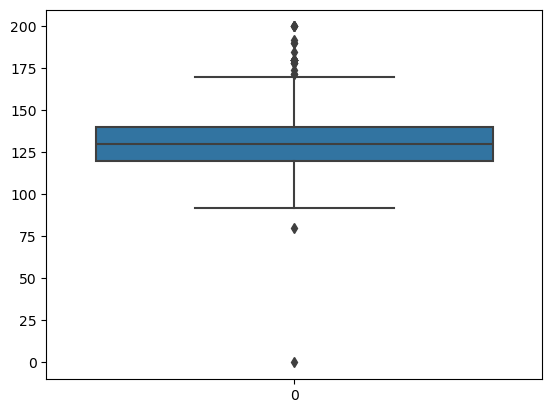

In [34]:
sns.boxplot(data["RestingBP"])

<Axes: >

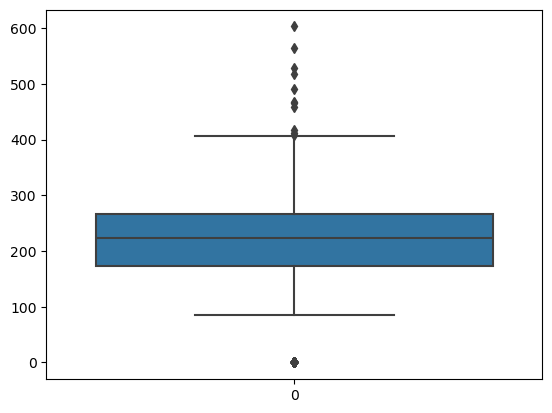

In [35]:
sns.boxplot(data["Cholesterol"])

<Axes: >

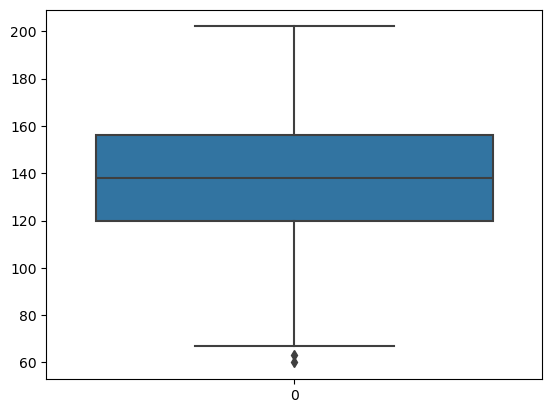

In [36]:
sns.boxplot(data["MaxHR"])

In [37]:
#### Remove the outlier
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1
IQR

Age               13.00
Sex                0.00
ChestPainType      2.00
RestingBP         20.00
Cholesterol       93.75
FastingBS          0.00
RestingECG         0.00
MaxHR             36.00
ExerciseAngina     1.00
Oldpeak            1.50
ST_Slope           1.00
HeartDisease       1.00
dtype: float64

In [38]:
data = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis = 1)]
data.shape

(278, 12)

<Axes: >

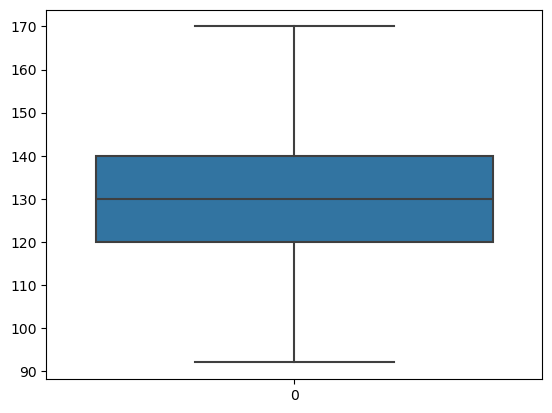

In [39]:
sns.boxplot(data["RestingBP"])

In [40]:
label = data["HeartDisease"].copy()
data = data.drop("HeartDisease",axis=1)

## Train Test Split


In [41]:
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size = 0.2, random_state = 42)

In [43]:
scale = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [44]:
import pickle

In [45]:
with open('scaler.pkl','wb') as f:
    pickle.dump(scale, f)

In [46]:
lor = LogisticRegression()
lor.fit(X_train, y_train)
y_pred = lor.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.88      0.81      0.85        27

    accuracy                           0.86        56
   macro avg       0.86      0.86      0.86        56
weighted avg       0.86      0.86      0.86        56



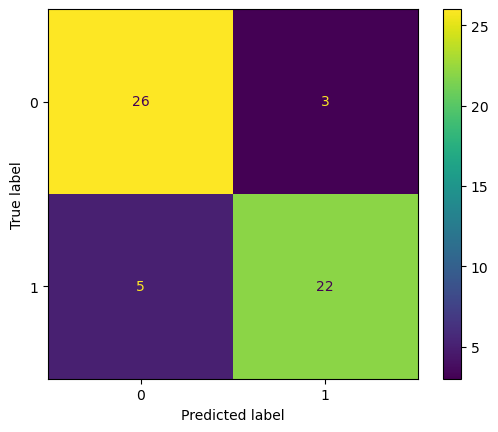

In [47]:
cm = confusion_matrix(y_test, y_pred, labels=lor.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lor.classes_)
disp.plot()

In [48]:
#printing the accuracy for test set
print('Accuracy of Logistic Regression model is {}'.format(accuracy_score(y_test,y_pred)*100))

Accuracy of Logistic Regression model is 85.71428571428571


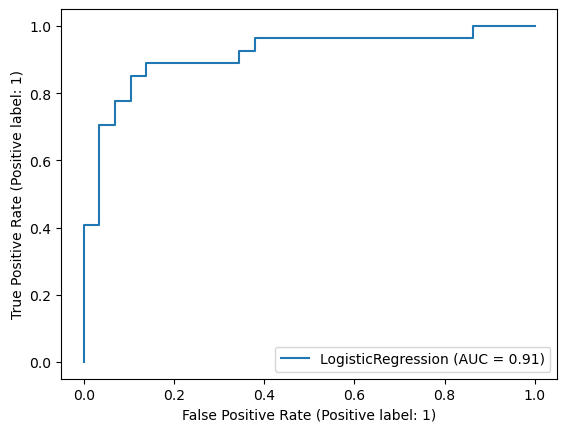

In [49]:
display = RocCurveDisplay.from_estimator(lor, X_test, y_test)

## Decision Tree


In [50]:
mdl = DecisionTreeClassifier(criterion="entropy", max_depth=6)
mdl.fit(X_train,y_train)
y_p = mdl.predict(X_test)

In [51]:
print(classification_report(y_test, y_p))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        29
           1       0.89      0.89      0.89        27

    accuracy                           0.89        56
   macro avg       0.89      0.89      0.89        56
weighted avg       0.89      0.89      0.89        56



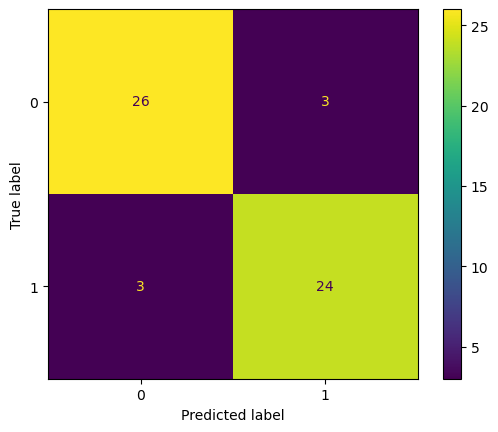

In [52]:
cm = confusion_matrix(y_test, y_p, labels=mdl.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mdl.classes_)
disp.plot()

In [53]:
#printing the accuracy for test set
print('Accuracy of Decision Tree model is {}'.format(accuracy_score(y_test,y_p)*100))

Accuracy of Decision Tree model is 89.28571428571429


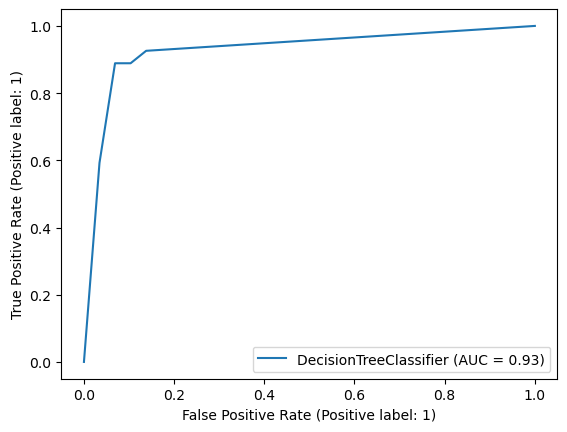

In [54]:
display = RocCurveDisplay.from_estimator(mdl, X_test, y_test)

## Random Forest


In [55]:
clf = RandomForestClassifier(n_estimators =100)
clf.fit(X_train, y_train)
pp = clf.predict(X_test)

In [56]:
print(classification_report(y_test, pp))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.88      0.85      0.87        27

    accuracy                           0.88        56
   macro avg       0.88      0.87      0.87        56
weighted avg       0.88      0.88      0.87        56



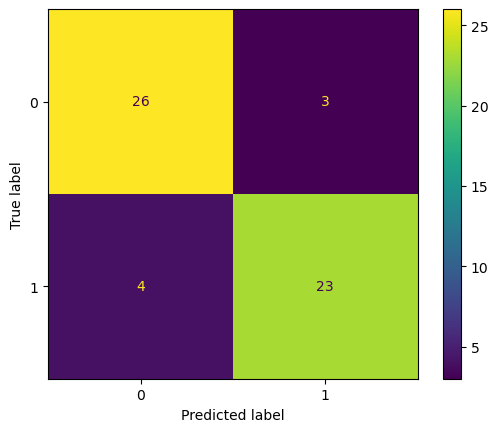

In [57]:
cm = confusion_matrix(y_test, pp, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

In [58]:
print('Accuracy of Random forest classifier model is {}'.format(accuracy_score(y_test,pp)*100))

Accuracy of Random forest classifier model is 87.5


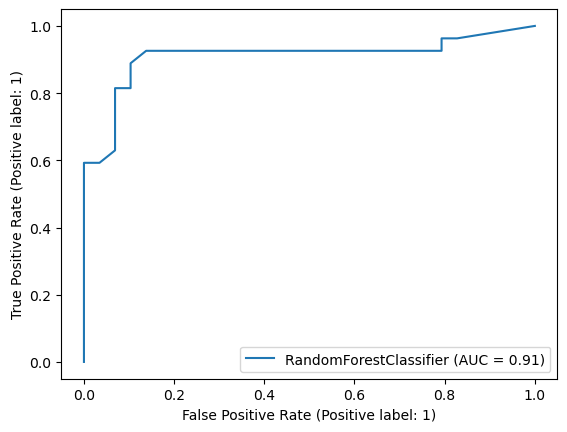

In [59]:
display = RocCurveDisplay.from_estimator(clf, X_test, y_test)

In [66]:
import joblib

In [67]:
heart_file = 'heart_model.sav'
joblib.dump(mdl, heart_file)

['heart_model.sav']

In [60]:
with open("heart_model.pkl", 'wb') as f:
    pickle.dump(mdl,f)